In [28]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
import analysis_functions as af
import analysis_system_level as asl
import itertools

from collections import defaultdict as ddict
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [30]:
sd_path = "../data/score_dicts/abstractive_summaries_score_dict.pkl"
# sd_path = "../data/score_dicts/extractive_summaries_score_dict.pkl" # uncomment for extractive
sd = af.get_pickle(sd_path)

## Exploring the scores dict
### Print score ranges

In [31]:
af.print_score_ranges(sd)

                          min    25-perc    median    75-perc      max     mean
--------------------  -------  ---------  --------  ---------  -------  -------
bert_f_score          -0.2046     0.1835    0.2731     0.3618   0.7778   0.2722
bert_precision_score  -0.2364     0.1553    0.2410     0.3495   0.8375   0.2527
bert_recall_score     -0.2986     0.1912    0.2933     0.3904   0.8436   0.2910
js-2                  -0.6931    -0.6112   -0.5611    -0.5013  -0.2021  -0.5492
litepyramid_recall     0.0000     0.1667    0.2708     0.3958   0.9375   0.2893
mover_score            0.0082     0.2229    0.2759     0.3378   0.7206   0.2835
rouge_1_f_score        0.1235     0.3603    0.4314     0.5081   0.8571   0.4366
rouge_1_precision      0.1017     0.3281    0.4000     0.4919   0.9412   0.4157
rouge_1_recall         0.0976     0.3814    0.4748     0.5833   0.9400   0.4837
rouge_2_f_score        0.0000     0.1146    0.1803     0.2610   0.6990   0.1984
rouge_2_precision      0.0000     0.1059

### How many documents?

In [32]:
len(sd)

100

### How many summaries per document?

In [33]:
print(np.mean([len(d['system_summaries']) for d in sd.values()]))

15.0


### What metrics found for each document?

In [34]:
mlist = af.get_metrics_list(sd)
mlist

['bert_f_score',
 'bert_precision_score',
 'bert_recall_score',
 'js-2',
 'litepyramid_recall',
 'mover_score',
 'rouge_1_f_score',
 'rouge_1_precision',
 'rouge_1_recall',
 'rouge_2_f_score',
 'rouge_2_precision',
 'rouge_2_recall',
 'rouge_l_f_score',
 'rouge_l_precision',
 'rouge_l_recall',
 'sms',
 'wms']

# Experiments

In [35]:
# list of metrics used in experiment
mlist = ['bert_recall_score', 'mover_score', 'wms', 'sms', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2', 
         'litepyramid_recall']

## Summary level analysis

In [36]:
np.set_printoptions(precision=4)

In [37]:
metrics = mlist
# prints a matrix ok Kendall's tau values between each metric pair. 
# Read this as a table where the column labels (list of metrics printed in the first line of output)
# are also the row labels from top to bottom.
af.print_ktau_matrix(metrics, percentile=[(0, 100)], sd=sd, cutoff_metric='litepyramid_recall', y_type='ktau')

['bert_recall_score', 'mover_score', 'wms', 'sms', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2', 'litepyramid_recall']
[[0.     0.5745 0.5331 0.4942 0.6153 0.6334 0.6067 0.5462 0.5637]]

[[0.     0.     0.5723 0.3175 0.5488 0.5985 0.5539 0.6255 0.5324]]

[[0.     0.     0.     0.5251 0.5001 0.5532 0.5039 0.5575 0.4986]]

[[0.     0.     0.     0.     0.3971 0.4072 0.2598 0.4885 0.1908]]

[[0.     0.     0.     0.     0.     0.6882 0.8382 0.5659 0.6051]]

[[0.     0.     0.     0.     0.     0.     0.6888 0.7548 0.6003]]

[[0.     0.     0.     0.     0.     0.     0.     0.5678 0.5879]]

[[0.     0.     0.     0.     0.     0.     0.     0.     0.5656]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]

total 1574/3600.0 = 43.72222222222222% values ignored


## System level analysis

15
{'litepyramid_recall_wms': 0.17062692507929303, 'litepyramid_recall_sms': 0.16086466748552125}

14
{'litepyramid_recall_wms': 0.22888682614993427}

12
{'litepyramid_recall_wms': 0.5785271648114744, 'litepyramid_recall_sms': 0.22339853222235434}

semsim_out.txt 0.3684374999999999
bart_out.txt 0.33072916666666663
neusumm_out.txt 0.3214583333333333
t5_out_11B.txt 0.31395833333333334
unilm_out_v2.txt 0.3044791666666667
unilm_out_v1.txt 0.2972916666666667
t5_out_large.txt 0.2939583333333333
two_stage_rl_out.txt 0.28229166666666666
presumm_out_ext_abs.txt 0.2814583333333333
t5_out_base.txt 0.279375
10
{'litepyramid_recall_mover_score': 0.0954039948083898, 'litepyramid_recall_wms': 0.9921797265519496, 'litepyramid_recall_sms': 0.355424405068255}

8
{'litepyramid_recall_bert_recall_score': 0.09941713968406207, 'litepyramid_recall_mover_score': 0.2695045417465955, 'litepyramid_recall_wms': 0.9613687056021779, 'litepyramid_recall_sms': 0.9119870600430092, 'litepyramid_recall_js-2': 0.08335484

Text(0.5, 0, 'top k systems according to litepyramid_recall')

Text(0, 0.5, 'pearson correlation between different metric pairs')

(-1, 1)

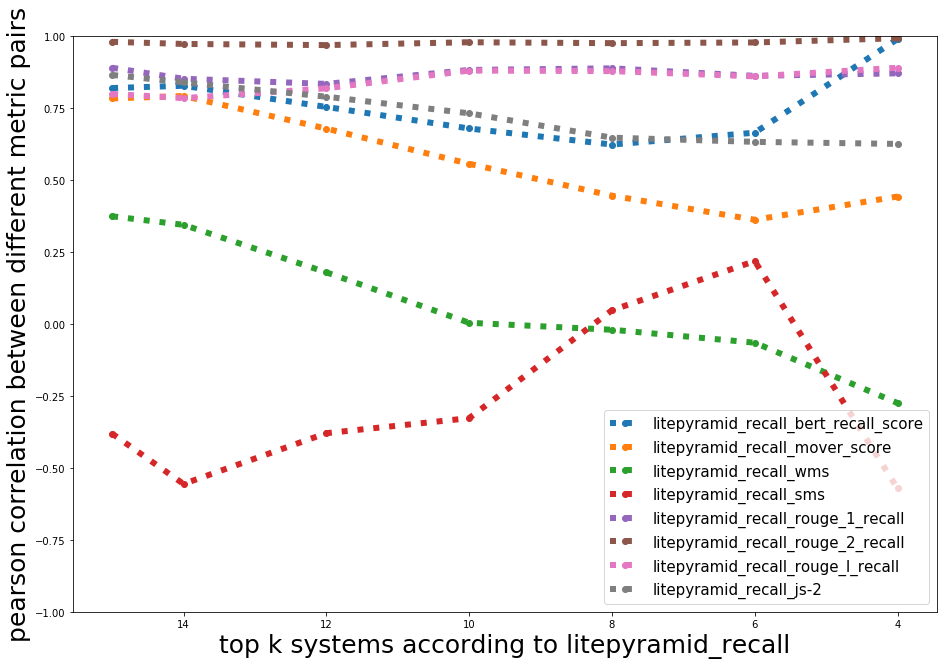

In [38]:
# plot k vs disagreements
kvalues = [15, 14, 12, 10, 8, 6, 4] # for abstractive
#kvalues = [10, 8, 6, 4] # uncomment for extractive

all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
systems = asl.get_system_level_scores(sd, mlist, agg='mean')
sorting_metric = 'litepyramid_recall'
correlation_method = 'pearson'

y = ddict(list)
for k in kvalues:
    top_ksystems = asl.get_topk(systems, k, metric=sorting_metric)
    if k == 10:
        for sys, scores in top_ksystems.items():
            print(sys, scores['litepyramid_recall'])
#     print(k, top_ksystems.keys())
    corr, pval = asl.get_correlation(top_ksystems, metric_pairs=all_pairs, method=correlation_method)
    for key in corr:
        y[key].append(corr[key])
        
    print(k)
    print({m: p for m, p in pval.items() if p > 0.05})
    print()
        
data = {
    'x': kvalues,
    **y,
}
labels = list(y.keys())

ax = plt.axes([0, 0, 2, 2])
lines = []
for label in labels:
    lines.append(ax.plot('x', label, data=data, linewidth=6.0, marker='o',
                         linestyle=':' if 'pyramid' in label else None))
plt.gca().invert_xaxis()
ax.legend(prop={'size': 15})
ax.set_xlabel(f"top k systems according to {sorting_metric}", fontsize=25)
ax.set_ylabel(f"{correlation_method} correlation between different metric pairs", fontsize=25)
plt.ylim(-1, 1)

In [39]:
for i in range(len(data['x'])):
    print('\t'.join(['{:.3f}'.format(data['x'][i])] + ['{:.3f}'.format(data[key][i]) for key in y.keys()]))

15.000	0.819	0.783	0.373	-0.381	0.889	0.979	0.798	0.864
14.000	0.826	0.791	0.344	-0.556	0.851	0.972	0.783	0.838
12.000	0.753	0.678	0.179	-0.380	0.833	0.968	0.818	0.789
10.000	0.678	0.556	0.004	-0.328	0.882	0.978	0.879	0.731
8.000	0.622	0.445	-0.021	0.047	0.887	0.974	0.877	0.646
6.000	0.664	0.361	-0.066	0.218	0.861	0.977	0.859	0.632
4.000	0.989	0.442	-0.275	-0.572	0.870	0.991	0.889	0.625


## Scoring Systems of Varying Quality

0
{'litepyramid_recall_bert_recall_score': 0.40858755130967245, 'litepyramid_recall_mover_score': 0.7237790894947214, 'litepyramid_recall_wms': 0.850929124210401, 'litepyramid_recall_sms': 0.4371029585670873, 'litepyramid_recall_rouge_l_recall': 0.32066859025253497, 'litepyramid_recall_js-2': 0.20678258418866988}

5
{'litepyramid_recall_bert_recall_score': 0.1613952462661366, 'litepyramid_recall_mover_score': 0.09989115137785769, 'litepyramid_recall_wms': 0.3100446142343856, 'litepyramid_recall_sms': 0.5336529223343769, 'litepyramid_recall_rouge_1_recall': 0.5206213898677248, 'litepyramid_recall_rouge_2_recall': 0.13074520738980475, 'litepyramid_recall_rouge_l_recall': 0.5118771211433486, 'litepyramid_recall_js-2': 0.2732105298358469}

10
{'litepyramid_recall_bert_recall_score': 0.13495356311495144, 'litepyramid_recall_mover_score': 0.5880276805807557, 'litepyramid_recall_wms': 0.9119668298287364, 'litepyramid_recall_sms': 0.7714815588458894, 'litepyramid_recall_js-2': 0.37249912419623

Text(0.5, 0, 'Low medium high according to litepyramid_recall')

Text(0, 0.5, 'pearson correlation between different metric pairs')

(-1, 1)

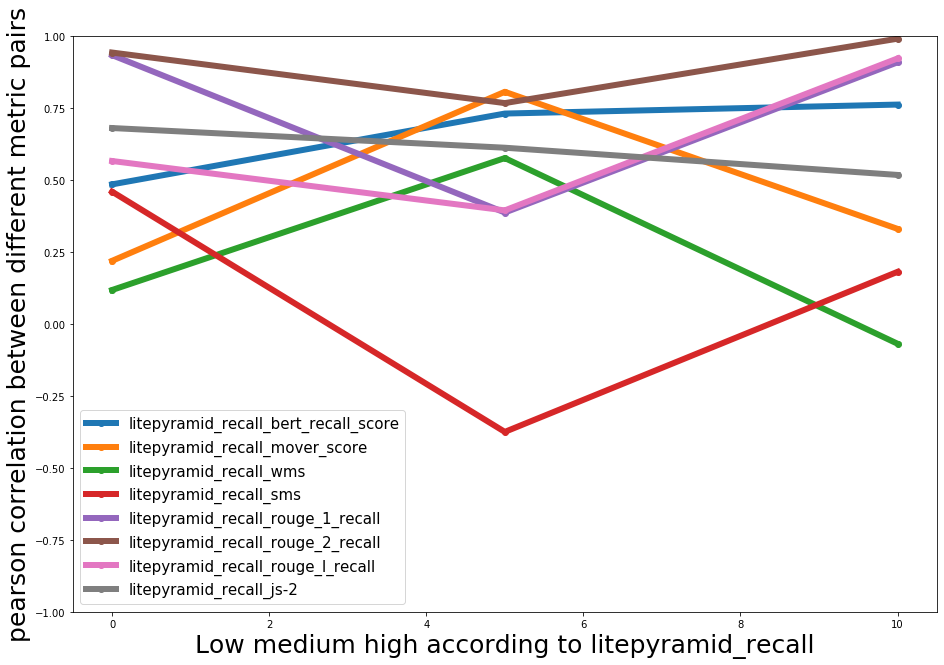

In [40]:
diff = 5
splits = [0, 5, 10] # for abstractive
# splits = [0, 3, 6] # uncomment for extractive

all_pairs = list(itertools.combinations(mlist, 2))
all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
sorting_metric = 'litepyramid_recall'
correlation_method = 'pearson'

systems = asl.get_system_level_scores(sd, mlist, agg='mean')
systems_l = [(name, score[sorting_metric]) for name, score in systems.items()]
systems_l = list(sorted(systems_l, key=lambda x: x[1]))

data_l = []
for split in splits:
    data_l.append({
        tup[0]: systems[tup[0]] for tup in systems_l[split: split + diff]
    })

y = ddict(list)
for k in range(0, len(splits)):
    corr, pval = asl.get_correlation(data_l[k], metric_pairs=all_pairs, method=correlation_method)
    for metric in corr:
        y[metric].append(corr[metric])
        
    print(splits[k])
    print({m: p for m, p in pval.items() if p > 0.05})
    print()
        
data = {
    'x': splits,
    **y,
}
labels = list(y.keys())

ax = plt.axes([0, 0, 2, 2])
lines = []
for label in labels:
    if 'pyr' in label:
        linestyle = None
    elif 'bert' in label:
        linestyle = '--'
    else:
        linestyle = None
    lines.append(ax.plot('x', label, data=data, linewidth=6.0, marker='o',
                         linestyle=linestyle))
ax.legend(prop={'size': 15})
ax.set_xlabel(f"Low medium high according to {sorting_metric}", fontsize=25)
ax.set_ylabel(f"{correlation_method} correlation between different metric pairs", fontsize=25)
plt.ylim(-1, 1)

In [41]:
for i in range(len(data['x'])):
    print('\t'.join(['{:.3f}'.format(data['x'][i])] + ['{:.3f}'.format(data[key][i]) for key in y.keys()]))

0.000	0.484	0.219	0.117	0.459	0.933	0.942	0.565	0.680
5.000	0.730	0.806	0.575	-0.375	0.386	0.766	0.394	0.611
10.000	0.761	0.330	-0.069	0.180	0.908	0.990	0.921	0.517


### Significance testing using William’s test

In [42]:
#  Write results for william's test to file

In [43]:
W_DATAPATH = "../data/"
human_scores_fp = W_DATAPATH + 'abs_human_scores.tsv' # change 'abs' to 'ext' for extractive
metric_scores_fp = W_DATAPATH + 'abs_metric_scores.tsv' # change 'abs' to 'ext' for extractive

In [44]:
header = 'METRIC\tLP\tTESTSET\tSYSTEM\tSCORE'

In [45]:
systems = asl.get_system_level_scores(sd, mlist, agg='mean')
len(systems)

15

In [46]:
# systems

In [47]:
with open(human_scores_fp, 'w') as f:
    f.write(header + '\n')
    for sys_name in systems:
        _ = f.write(f"HUMAN\ten-en\tcnndm\t{sys_name}\t{systems[sys_name]['litepyramid_recall']}\n")

31

In [48]:
with open(metric_scores_fp, 'w') as f:
    f.write(header + '\n')
    for m in mlist:
        if m == 'litepyramid_recall':
            continue
        for sys_name in systems:
            _ = f.write(f"{m}\ten-en\tcnndm\t{sys_name}\t{systems[sys_name][m]}\n")

31

## Bootstrap Resampling

In [49]:
systems = asl.get_system_level_scores(sd, mlist, agg='none')
# systems
sys_names = list(systems.keys())
all_system_pairs = list(itertools.combinations(sys_names, 2))

In [50]:
from random import choices

In [51]:
def get_predictions_br(system_pairs, systems, metric):
    preds = {}
    for pair in system_pairs:
        sys1 = systems[pair[0]][metric]
        sys2 = systems[pair[1]][metric]
        n = len(sys1)
        points = [i for i in range(0, n)]
        is_better = 0
        for i in range(1000):
            sample = choices(points, k=n)
            sys1_ = [sys1[p] for p in points]
            sys2_ = [sys2[p] for p in points]
            if np.mean(sys1_) > np.mean(sys2_):
                is_better += 1
                
        if is_better/1000 >= 0.95:
            preds[pair] = 0 # pair[0] is better
        elif is_better/1000 <= 0.05:
            preds[pair] = 1 # pair[1] is better
        else:
            preds[pair] = 2 # can't say
    return preds

In [52]:
# print 1 if second metric is better than the first 
human_judgements = get_predictions_br(all_system_pairs, systems, 'litepyramid_recall')

In [53]:
human_judgements

{('presumm_out_trans_abs.txt', 'two_stage_rl_out.txt'): 1,
 ('presumm_out_trans_abs.txt', 'unilm_out_v2.txt'): 1,
 ('presumm_out_trans_abs.txt', 't5_out_large.txt'): 1,
 ('presumm_out_trans_abs.txt', 'presumm_out_ext_abs.txt'): 1,
 ('presumm_out_trans_abs.txt', 'ptr_generator_out_pointer_gen_cov.txt'): 0,
 ('presumm_out_trans_abs.txt', 'neusumm_out.txt'): 1,
 ('presumm_out_trans_abs.txt', 'bart_out.txt'): 1,
 ('presumm_out_trans_abs.txt', 'fast_abs_rl_out_rerank.txt'): 1,
 ('presumm_out_trans_abs.txt', 't5_out_11B.txt'): 1,
 ('presumm_out_trans_abs.txt', 'presumm_out_abs.txt'): 1,
 ('presumm_out_trans_abs.txt', 'bottom_up_out.txt'): 0,
 ('presumm_out_trans_abs.txt', 'unilm_out_v1.txt'): 1,
 ('presumm_out_trans_abs.txt', 't5_out_base.txt'): 1,
 ('presumm_out_trans_abs.txt', 'semsim_out.txt'): 1,
 ('two_stage_rl_out.txt', 'unilm_out_v2.txt'): 1,
 ('two_stage_rl_out.txt', 't5_out_large.txt'): 1,
 ('two_stage_rl_out.txt', 'presumm_out_ext_abs.txt'): 0,
 ('two_stage_rl_out.txt', 'ptr_genera

In [ ]:
# print f1 scores
y_true = [human_judgements[pair] for pair in all_system_pairs]
metrics = mlist
for metric in metrics:
    metric_predictions = get_predictions_br(all_system_pairs, systems, metric)
    
    y_pred = [metric_predictions[pair] for pair in all_system_pairs]
    print(metric, f1_score(y_true, y_pred, average='weighted'))

bert_recall_score 0.8538631466247442
mover_score 0.8560816099120492
wms 0.6761904761904762
sms 0.4455130200228239
rouge_1_recall 0.7904761904761904
rouge_2_recall 0.9619674185463658
rouge_l_recall 0.8090676211531039
js-2 0.8554607713564819
